In [39]:
#Description: Artificial recurrent NN called lstm.
#Prediction of closing stock price of Apple.inc based on past 60 day stock prices

In [40]:
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-18,316.500000,310.320007,313.170013,314.959991,33843100.0,314.959991
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,313.140015
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,319.230011


In [42]:
#Dimensions of data set
df.shape

(2111, 6)

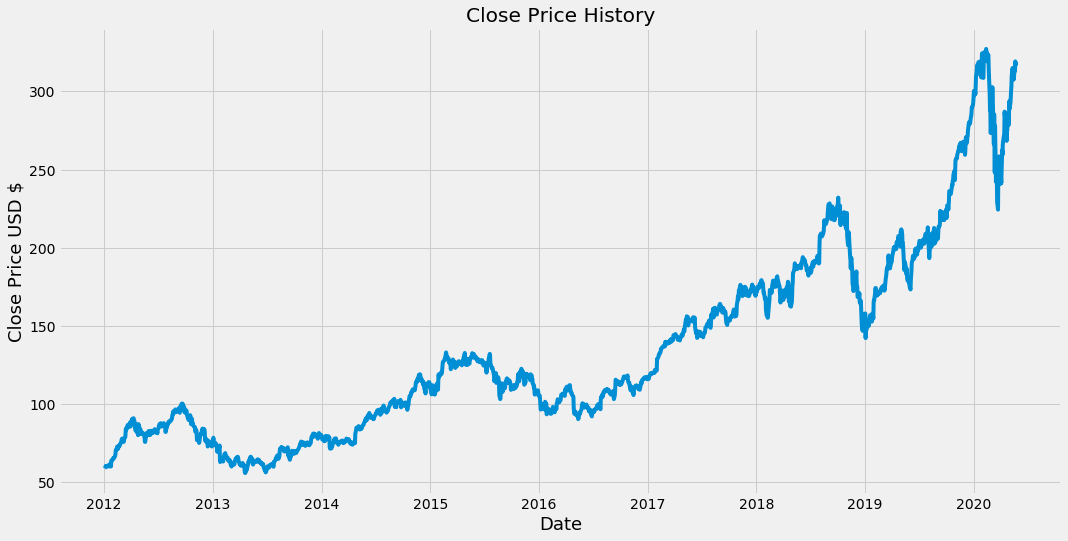

In [43]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [44]:
#Create a new dataframe with only close col
data = df.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get number of rows to train data on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1689

In [45]:
#Scale the data (pre-processing)
scaler = MinMaxScaler(feature_range=(0,1)) #ranges data from 0-1 inclusive
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.97063483],
       [0.96186579],
       [0.96938213]])

In [46]:
#Create training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :] #all values of all columns (= :)
#Split data into x and y train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)): 
    #Appending last 60 entries to data set
    x_train.append(train_data[i-60:i, 0]) #0-59 values
    y_train.append(train_data[i, 0]) #61st value we will try to predict
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [47]:
#Convert x and y _train to numpy arrays for lstm model
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
#Reshape the data
# x_train.shape #Only 2-Dimensional right now, for ltsm must be 3-Dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape # Now 3 Dimensional

(1629, 60, 1)

In [49]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
#False as is final Layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [50]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1629/1629 [==============================] - 51s 31ms/step - loss: 6.5604e-04


In [52]:
#Create testing data set
#Create new array containing scaled values from index 1543 - 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x and y _test
x_test = []
y_test = dataset[training_data_len: , :] #Values we want to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [53]:
#Convert data to np #Lstm models only accept np array
x_test = np.array(x_test)

In [54]:
#Reshape data
#rows = x_test.shape[0]
#columns = x_test.shape[1]
#features = 1 #Just closing price we are interested in
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # We want predictions to = y_test data set

In [56]:
#Get the root mean squared error (RSME) / Accuracy / residual SD 
rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme

0.4413113707049763

C:\Users\xemme\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


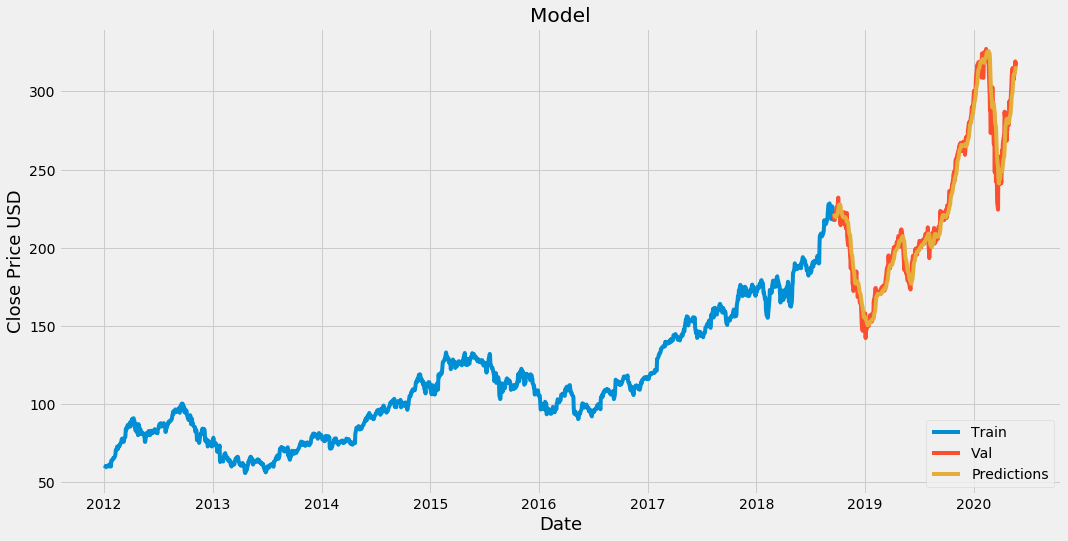

In [57]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [58]:
#Show valid and prediction prices
valid

,Close,Predictions
Date,,
2018-09-19,218.369995,221.807251
2018-09-20,220.029999,220.949921
2018-09-21,217.660004,220.376892
2018-09-24,220.789993,219.736465
2018-09-25,222.190002,219.528976
...,...,...
2020-05-18,314.959991,311.505981
2020-05-19,313.140015,312.535248
2020-05-20,319.230011,313.361267


In [60]:
#Predict stock for certain day
#Get quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-25')
#Create new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing prices and convert df to array
last_60_days = new_df[-60:].values
#Scale the data for vlaues between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append scaled past 60 days
X_test.append(last_60_days_scaled)
#Convert x_test to np array
X_test = np.array(X_test) #For lstm model
#Reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[317.29608]]


In [62]:
#Get quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-05-26', end='2020-05-26')
print(apple_quote2['Close'])

Date
2020-05-26    316.829987
Name: Close, dtype: float64
